# What drives the price of a car?

![](images/kurt.jpeg)

In [251]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
import datetime

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [252]:
#Data problem definition
# The goal of this problem is to develop a predictive model that will correctly predict the prices of used cars based on various features
# such as Odometer readings, Size of the cars, make/model of the car and so on. 


In [253]:
# We would need to employ various Regression models to identify petterns, imporatnat features that contributes to the price determinatio
# based on the historic data and accurately predict any future car sale prices.

In [254]:
#In summary, the objective is to create a robust predictive model that accurately predicts the prices of used cars
#and identified the modt significant factires cintributing to their valuation.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [255]:
# Data Collection --> This phase is done with loading vehicle.csv data
vehicleDf = pd.read_csv("data/vehicles.csv")
# Data Visualization

In [256]:
# Data Description
vehicleDf.info()
# The cursory overview of the data
# Total 426880 Samples and 18 Features
# Categorical data - region, model, manufacturer, condition, 
# cylinders,fuel, title_status, transmission, VIN, drive, size
# type, paint_color, state
# Numerical data - id, price, year, float
vehicleDf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [257]:
# Data Quality
vehicleDf.head()

#Looks like we have a lot of NaNs present in the data

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [258]:
#Let's see how much missing values are present per feature.
missingVals = vehicleDf.isnull().sum()
print(missingVals)

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [259]:
#Identify the unique fields in each of the categorical data
for column in vehicleDf.columns:
    if vehicleDf[column].dtype == 'object':
        print(f"{column}: {vehicleDf[column].unique()}\n")
        

region: ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 'colorado springs

In [260]:
#drop 17646 manufacturer column entries as NANs
vehicleDf = vehicleDf[vehicleDf.manufacturer.notnull()]

#FILLNA for some of the category columns with mode
fillNaCategoryList = ['year', 'fuel', 'title_status', 'transmission', 'type', 'drive', 'condition','cylinders', 'drive', 'paint_color']
for col in fillNaCategoryList:
    vehicleDf[col] = vehicleDf[col].fillna(vehicleDf[col].mode()[0])

#fillNA for odometer as mean since its a float var
vehicleDf['odometer'] = vehicleDf['odometer'].fillna(vehicleDf['odometer'].mean())

missingVals = vehicleDf.isnull().sum()
print(missingVals)

id                   0
region               0
price                0
year                 0
manufacturer         0
model             5208
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
VIN             151128
drive                0
size            293933
type                 0
paint_color          0
state                0
dtype: int64


In [261]:
# Create mapping between 'type' and 'size'
#mapping = vehicleDf.groupby('type')['size'].apply(lambda x: x.mode().iloc[0]).to_dict()
#print(mapping)
# Apply fillna using the mapping
#vehicleDf['size'] = vehicleDf.apply(lambda row: mapping.get(row['type'], row['size']), axis=1)
#missingVals = vehicleDf.isnull().sum()
#print(missingVals)

#sub-compact size has no mapping to type hence got dropped

In [262]:
#dropping NaNs this will reduce the number of samples to 80170
columnList = [ 'VIN', 'region', 'id', 'model']
newVehicleDf = vehicleDf.drop(columnList, axis=1)
newVehicleDf = newVehicleDf.dropna()
newVehicleDf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115301 entries, 31 to 426836
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         115301 non-null  int64  
 1   year          115301 non-null  float64
 2   manufacturer  115301 non-null  object 
 3   condition     115301 non-null  object 
 4   cylinders     115301 non-null  object 
 5   fuel          115301 non-null  object 
 6   odometer      115301 non-null  float64
 7   title_status  115301 non-null  object 
 8   transmission  115301 non-null  object 
 9   drive         115301 non-null  object 
 10  size          115301 non-null  object 
 11  type          115301 non-null  object 
 12  paint_color   115301 non-null  object 
 13  state         115301 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 13.2+ MB


In [291]:
#Remove outliers in price

# Calculate the IQR (Interquartile Range)
Q1 = newVehicleDf['price'].quantile(0.25)
Q3 = newVehicleDf['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = newVehicleDf[(newVehicleDf['price'] < lower_bound) | (newVehicleDf['price'] > upper_bound)]

# Remove outliers from the DataFrame
newVehicleDf = newVehicleDf[(newVehicleDf['price'] >= lower_bound) & (newVehicleDf['price'] <= upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers.info())

# Print the DataFrame after removing outliers
print("\nDataFrame after removing outliers:")
print(newVehicleDf.info())


Outliers:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 734 to 426107
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1960 non-null   int64  
 1   year             1960 non-null   float64
 2   odometer         1960 non-null   float64
 3   conditionInt     1960 non-null   float64
 4   sizeInt          1960 non-null   float64
 5   title_statusInt  1960 non-null   float64
 6   fuelInt          1960 non-null   int64  
 7   cylindersInt     1960 non-null   int64  
 8   transmissionInt  1960 non-null   int64  
 9   paint_colorInt   1960 non-null   int64  
 10  manufacturerInt  1960 non-null   int64  
 11  stateInt         1960 non-null   int64  
 12  typeInt          1960 non-null   int64  
 13  driveInt         1960 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 229.7 KB
None

DataFrame after removing outliers:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 


Pairplot for numerical variables:


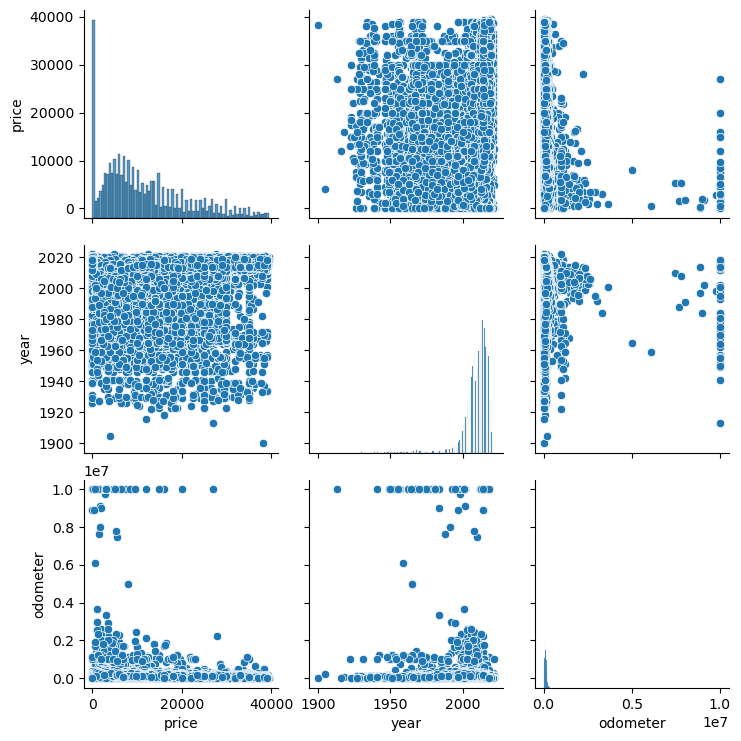

In [264]:
# Pairplot for numerical deatures
print("\nPairplot for numerical variables:")
sns.pairplot(newVehicleDf)
plt.show()

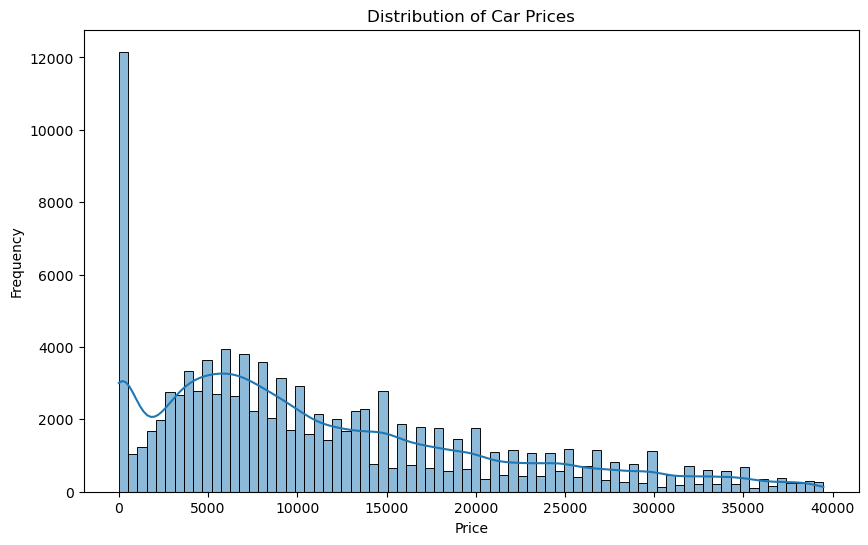

In [265]:
# Lets see how the car prices are distributed
plt.figure(figsize=(10, 6))
sns.histplot(newVehicleDf['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

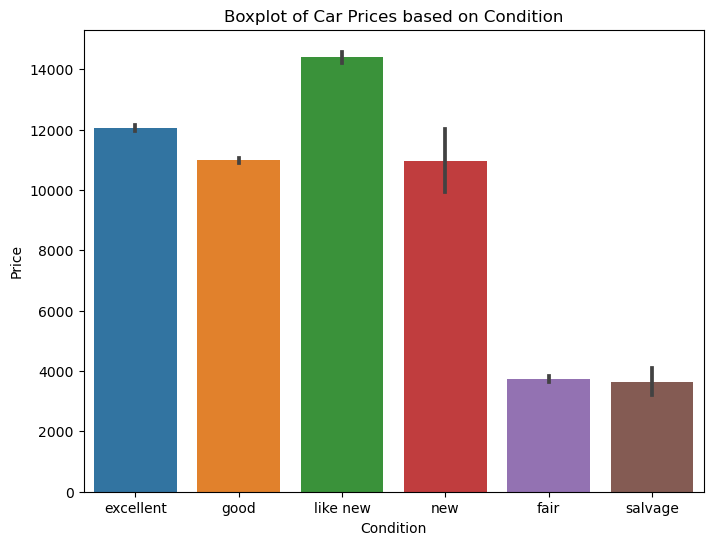

In [266]:
# Boxplot of car prices based on car condition
plt.figure(figsize=(8, 6))
sns.barplot(x='condition', y='price', data=newVehicleDf)
plt.title('Boxplot of Car Prices based on Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

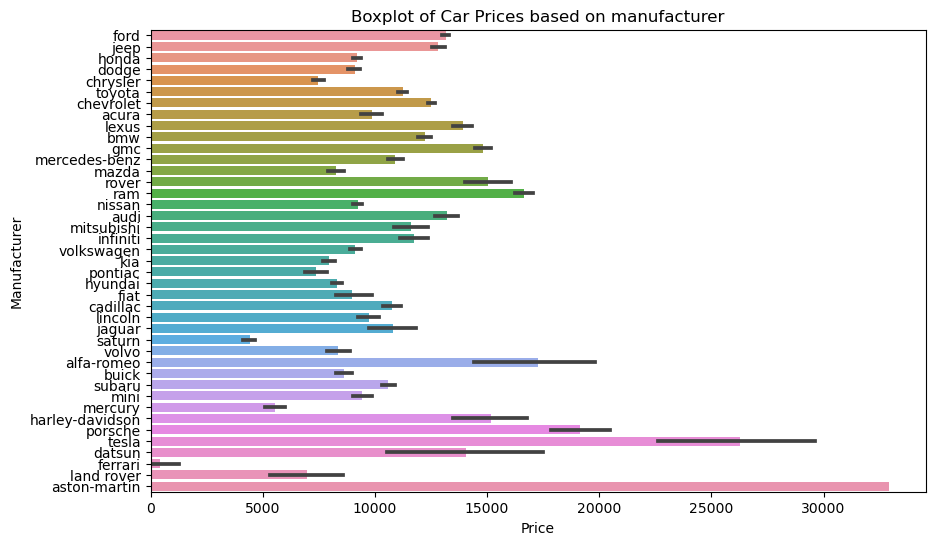

In [267]:
# Boxplot of car prices based on car manufacturer
plt.figure(figsize=(10, 6))
sns.barplot(y='manufacturer', x='price', data=newVehicleDf)
plt.title('Boxplot of Car Prices based on manufacturer')
plt.ylabel('Manufacturer')
plt.xlabel('Price')
plt.show()

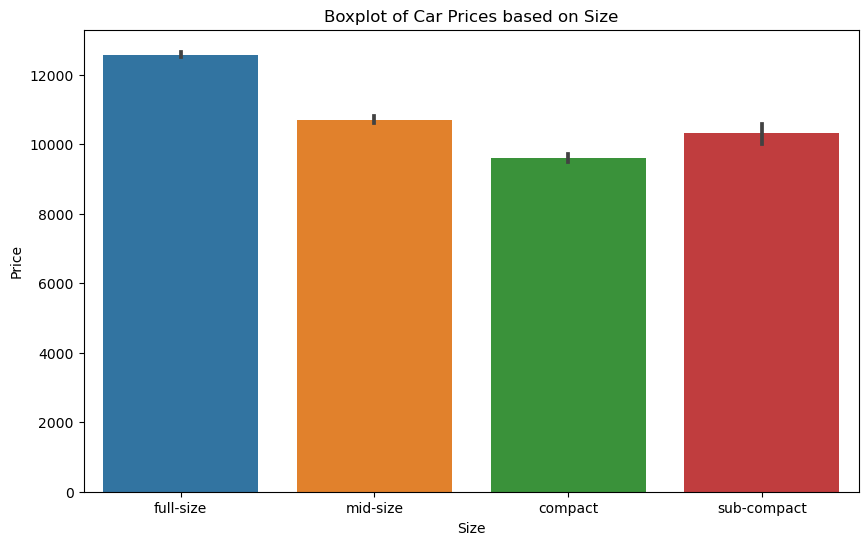

In [268]:
# Boxplot of car prices based on car size
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='price', data=newVehicleDf)
plt.title('Boxplot of Car Prices based on Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

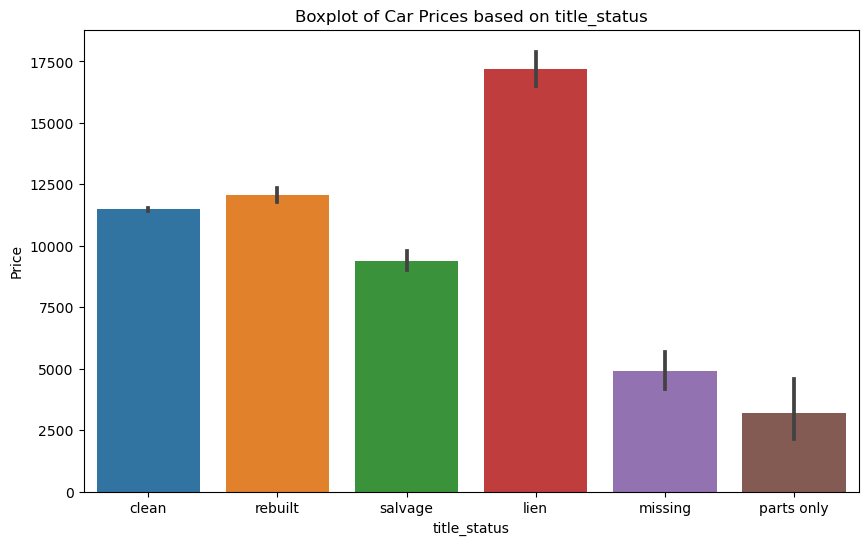

In [269]:
# BarPlot of car prices based on car size
plt.figure(figsize=(10, 6))
sns.barplot(x='title_status', y='price', data=newVehicleDf)
plt.title('Boxplot of Car Prices based on title_status')
plt.xlabel('title_status')
plt.ylabel('Price')
plt.show()

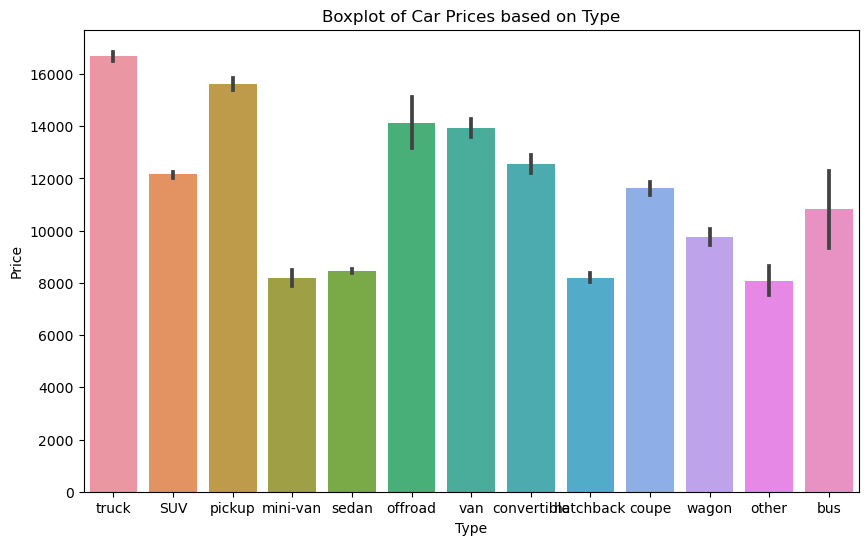

In [270]:
# BarPlot of car prices based on car type
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='price', data=newVehicleDf)
plt.title('Boxplot of Car Prices based on Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

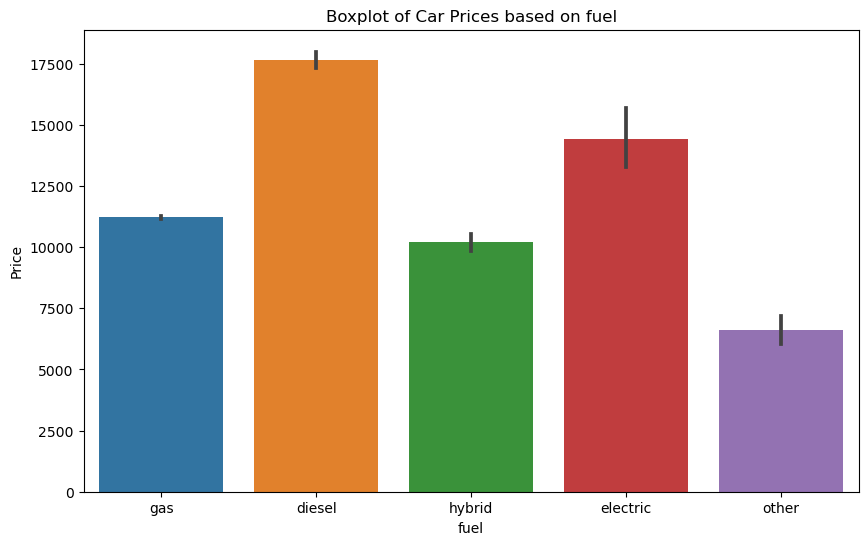

In [271]:
# BarPlot of car prices based on car type
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel', y='price', data=newVehicleDf)
plt.title('Boxplot of Car Prices based on fuel')
plt.xlabel('fuel')
plt.ylabel('Price')
plt.show()

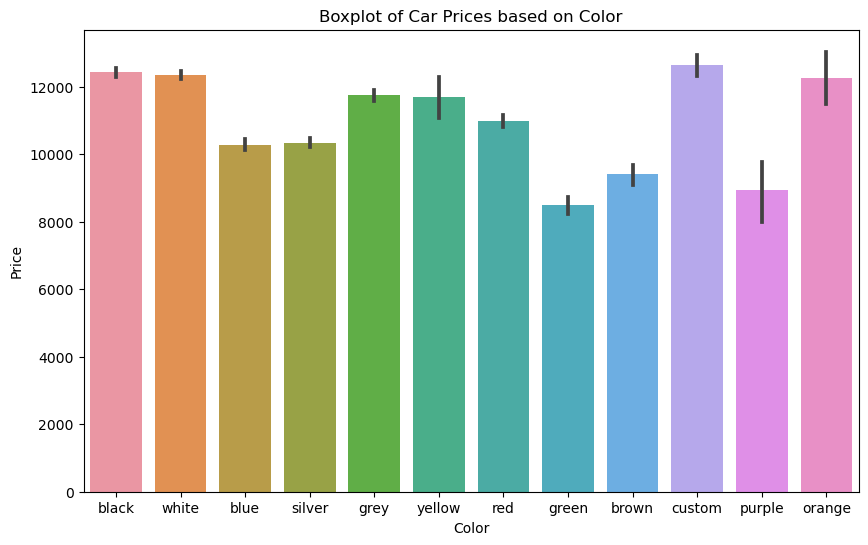

In [272]:
# BarPlot of car prices based on car color
plt.figure(figsize=(10, 6))
sns.barplot(x='paint_color', y='price', data=newVehicleDf)
plt.title('Boxplot of Car Prices based on Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

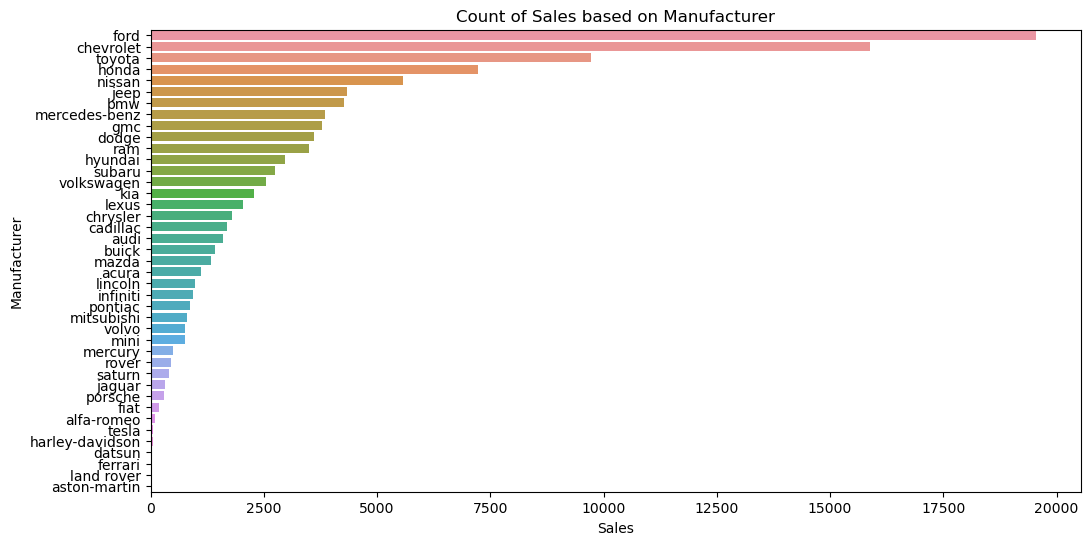

In [273]:
# Bar plot of all Manufacturer Sales
plt.figure(figsize=(12, 6))
sns.countplot(y='manufacturer', data=newVehicleDf, order=newVehicleDf['manufacturer'].value_counts().index)
plt.title('Count of Sales based on Manufacturer')
plt.xlabel('Sales')
plt.ylabel('Manufacturer')
plt.show()

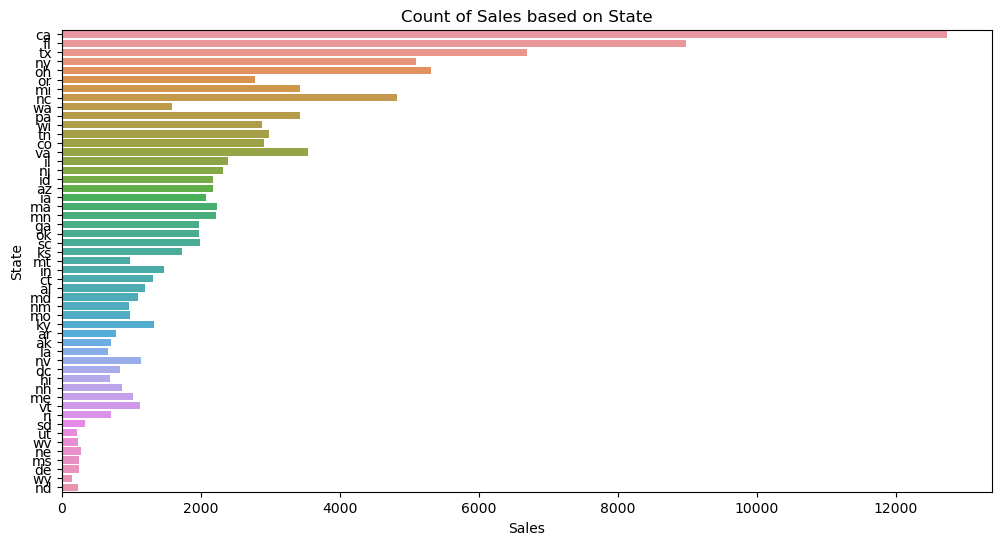

In [274]:
# Bar plot of all Statewise Sales
plt.figure(figsize=(12, 6))
sns.countplot(y='state', data=newVehicleDf, order=vehicleDf['state'].value_counts().index)
plt.title('Count of Sales based on State')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

In [275]:
curr_year =datetime.datetime.now().year
newVehicleDf['age'] = curr_year -newVehicleDf['year']
newVehicleDf.head()
print(newVehicleDf['age'].unique())

[ 11.  13.  20.  12.  23.   7.  21.  16.   6.   5.  18.  10.  15.  22.
  26.  29.  46.  50.  28.   9.  24.  69.  52.  19.   8.  17.  30.  14.
   4.  45.  40.  25.  32.  36.  48.  67.  33.  61.  56.  27.  34.  66.
  42.  76.  38.   3.  39.  73.  88.  58.  35.  57.  77.  71.  62.  51.
  60.  47.  53.  43.  31.  37.  94.  78.  44.  41.  65.  59.  91.  55.
  64.  54.  72.  95.  92.  68. 100.  49.  85.  87. 101.  63.  84. 106.
  96.  74.  89.  86.  75.  90. 124.  93.  98.  97.  70.  83.  82. 102.
   2. 119. 111.  99. 108.  80.]


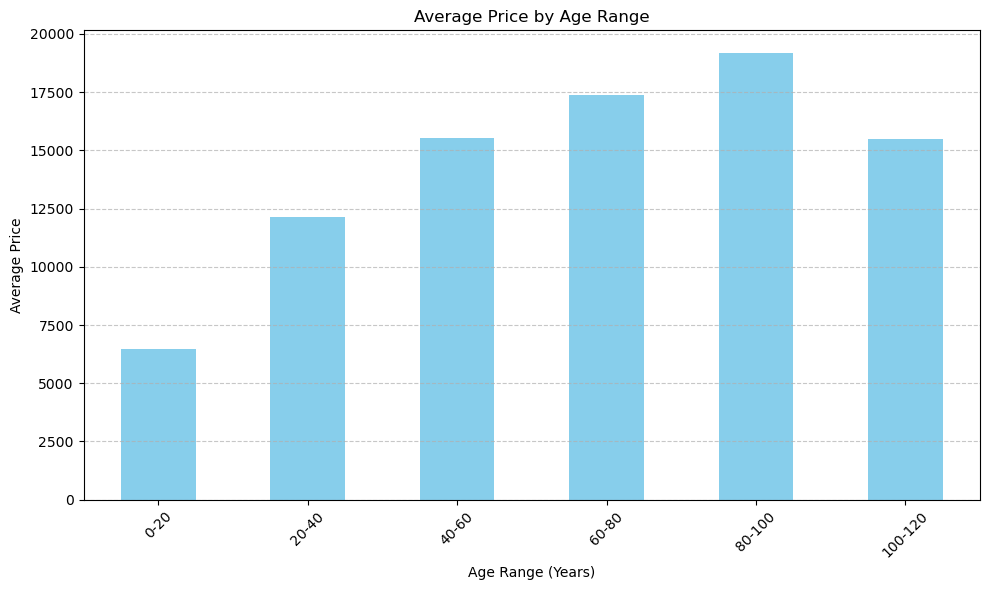

In [276]:

# Assuming 'age' column represents the age of the car
# Define age ranges
bins = [20, 40, 60, 80, 100, 110, 120] 

# Bin the 'age' column into age ranges
newVehicleDf['age_range'] = pd.cut(newVehicleDf['age'], bins=bins, labels=['0-20', '20-40', '40-60', '60-80', '80-100', '100-120'])

# Calculate the average price for each age range
avg_price_by_age_range = newVehicleDf.groupby('age_range')['price'].mean()

# Plot age range vs average price
plt.figure(figsize=(10, 6))
avg_price_by_age_range.plot(kind='bar', color='skyblue')
plt.title('Average Price by Age Range')
plt.xlabel('Age Range (Years)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [277]:
#Summary of Data Understanding phase
newVehicleDf.drop(columns = ['age','age_range'], axis=1, inplace=True)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [278]:
#drop Columns that would not yeild any inormation or have high correlation with other fields
# Dropping model as manufacturer and model are highly co-related, same for region, to state. 
#dropping VIN and ID as they do not provide any meaningful information.

oheVehicleDf = newVehicleDf.copy()
oheVehicleDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110385 entries, 31 to 426836
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         110385 non-null  int64  
 1   year          110385 non-null  float64
 2   manufacturer  110385 non-null  object 
 3   condition     110385 non-null  object 
 4   cylinders     110385 non-null  object 
 5   fuel          110385 non-null  object 
 6   odometer      110385 non-null  float64
 7   title_status  110385 non-null  object 
 8   transmission  110385 non-null  object 
 9   drive         110385 non-null  object 
 10  size          110385 non-null  object 
 11  type          110385 non-null  object 
 12  paint_color   110385 non-null  object 
 13  state         110385 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 12.6+ MB


In [279]:
#Now we start encoding
#ordinal encodeing for condition/Size/title_status
#Condition
condCat = ['salvage', 'fair', 'good', 'like new', 'excellent', 'new']
condEncoder = OrdinalEncoder(categories=[condCat])
newVehicleDf['conditionInt'] = condEncoder.fit_transform(newVehicleDf[['condition']])

#Size
sizeCat = [ 'sub-compact','compact' ,'mid-size', 'full-size']
sizeEncoder = OrdinalEncoder(categories=[sizeCat])
newVehicleDf['sizeInt'] = sizeEncoder.fit_transform(newVehicleDf[['size']])

#title_status
titleCat = ['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']
titleEncoder = OrdinalEncoder(categories=[titleCat])
newVehicleDf['title_statusInt'] = titleEncoder.fit_transform(newVehicleDf[['title_status']])


newVehicleDf.sample()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,conditionInt,sizeInt,title_statusInt
294028,5000,2009.0,honda,excellent,6 cylinders,gas,150000.0,clean,automatic,fwd,mid-size,sedan,custom,oh,4.0,2.0,5.0


In [280]:
#Label encode columns fuel, cylinder, transmission, paint_color, type, manufacturer, state
EncodeColumns = ['fuel', 'cylinders', 'transmission', 'paint_color', 'manufacturer', 'state', 'type', 'drive']
encoder = LabelEncoder()
for col in EncodeColumns:
    newColName = f'{col}Int'
    newVehicleDf[newColName] = encoder.fit_transform(newVehicleDf[col])


newVehicleDf.drop(EncodeColumns, axis=1, inplace=True)
newVehicleDf.drop(['condition', 'title_status', 'size'], axis=1, inplace=True)
newVehicleDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110385 entries, 31 to 426836
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   price            110385 non-null  int64  
 1   year             110385 non-null  float64
 2   odometer         110385 non-null  float64
 3   conditionInt     110385 non-null  float64
 4   sizeInt          110385 non-null  float64
 5   title_statusInt  110385 non-null  float64
 6   fuelInt          110385 non-null  int64  
 7   cylindersInt     110385 non-null  int64  
 8   transmissionInt  110385 non-null  int64  
 9   paint_colorInt   110385 non-null  int64  
 10  manufacturerInt  110385 non-null  int64  
 11  stateInt         110385 non-null  int64  
 12  typeInt          110385 non-null  int64  
 13  driveInt         110385 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 12.6 MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [281]:
#This would be common for both RFR and Ridge
X = newVehicleDf.drop('price', axis=1)
y = newVehicleDf['price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [282]:
#Running RandomForestRegressor on LabelEncoded data

# Define the pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('rf', RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42 ))  # Random Forest Regressor
])

# Define hyperparameters for grid search
rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Get the best model
rf_best_model = rf_grid_search.best_estimator_
print(rf_best_model)
# Feature importance DataFrame
rf_feature_importance_df = pd.DataFrame({
    'Feature': X.columns.values,
    'Importance': rf_best_model.named_steps['rf'].feature_importances_
})

/Users/paloorka/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                       random_state=42))])


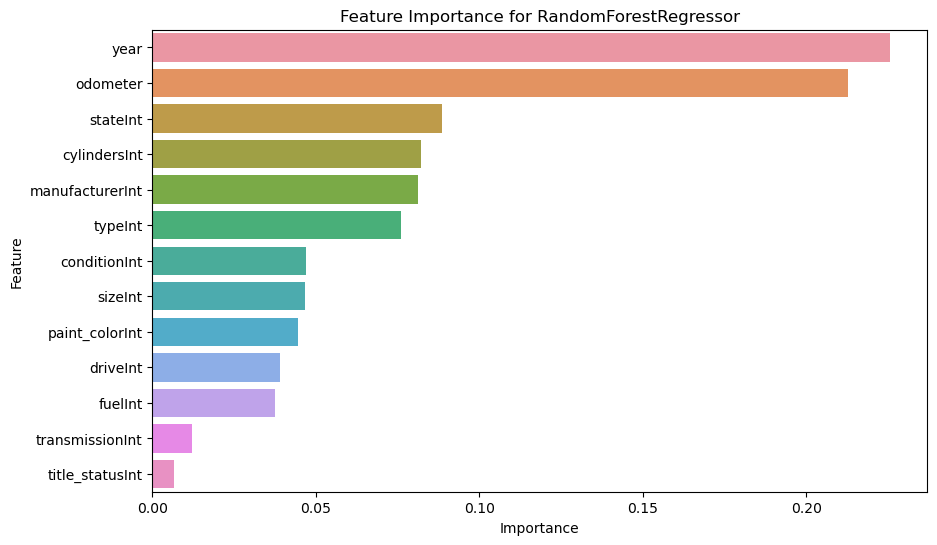

In [283]:
# Sort the DataFrame by importance values
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(rf_feature_importance_df, y= 'Feature', x= 'Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for RandomForestRegressor')
plt.show()

In [284]:
#Accuuracy of RandomForestRegressor predictions
rf_best_model
train_preds = rf_best_model.predict(X_train)
test_preds = rf_best_model.predict(X_test)

print(f'Train MAE: {mean_absolute_error(y_train, train_preds)}')
print(f'Test MAE: {mean_absolute_error(y_test, test_preds)}')

print(f'Train R2score: {r2_score(y_train, train_preds)}')
print(f'Test R2score: {r2_score(y_test, test_preds)}')

Train MAE: 975.9915682388338
Test MAE: 2539.08357970739
Train R2score: 0.9616237801599634
Test R2score: 0.7769356877357048


In [289]:
#Running Ridge on LabelEncoded data

# Define the pipeline
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('ridge', Ridge())  # Random Forest Regressor
])

# Define hyperparameters for grid search
ridge_param_grid = {
    'ridge__alpha':  [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Perform grid search cross-validation
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
ridge_grid_search.fit(X_train, y_train)

# Get the best model
ridge_best_model = ridge_grid_search.best_estimator_
print(ridge_best_model)
# Feature importance DataFrame
ridge_feature_importance_df = pd.DataFrame({
    'Feature': X.columns.values,
    'Importance': ridge_best_model.named_steps['ridge'].coef_
})

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=0.001))])


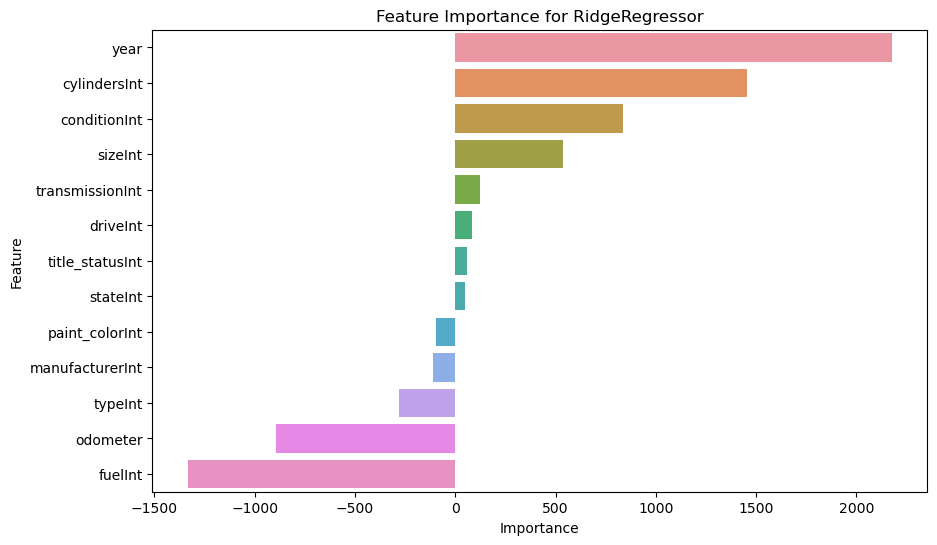

In [290]:
# Sort the DataFrame by importance values
ridge_feature_importance_df = ridge_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(ridge_feature_importance_df, y= 'Feature', x= 'Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for RidgeRegressor')
plt.show()

In [287]:
#Accuuracy of RidgeRegressor predictions
train_preds = ridge_best_model.predict(X_train)
test_preds = ridge_best_model.predict(X_test)
print(f'Train MAE: {mean_absolute_error(y_train, train_preds)}')
print(f'Test MAE: {mean_absolute_error(y_test, test_preds)}')

print(f'Train R2score: {r2_score(y_train, train_preds)}')
print(f'Test R2score: {r2_score(y_test, test_preds)}')

Train MAE: 6966.286497925658
Test MAE: 6939.131553444347
Train R2score: 0.1137318192404364
Test R2score: 0.11812070951615827


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [288]:
# As a used car dealer looking to fine-tune your inventory pricing strategy, 
# understanding the factors that positively and negatively impact pricing is crucial for maximizing profitability and optimizing sales. 
# By analyzing the vehicle dataset with over 400k entries here are some insights into these factors and suggest actionable steps.


#Top 5 car manufactureres with highestnukber of sales and avg sale price ranging between 100k to 150k
# Top 5 states with highest number ff sales NY, Ca, florida ,ohio, 

# Positive Factors Impacting Pricing:
# 1. **Car Age:** Newer cars generally command higher prices due to their lower mileage and perceived reliability. Consider prioritizing newer models in your inventory and adjusting prices accordingly.
# 2. **Brand and Model:** Popular and reputable brands/models tend to have higher resale values. Focus on stocking sought-after brands and models to attract customers willing to pay premium prices.
# 3. **Features and Options:** Cars equipped with desirable features such as navigation systems, leather seats, and advanced safety features often fetch higher prices. Consider highlighting these features in your marketing efforts and pricing strategy.
# 4. **Condition:** Well-maintained cars with a clean service history and minimal wear and tear typically command higher prices. Invest in reconditioning and detailing services to improve the overall condition of your inventory.

#Negative Factors Impacting Pricing:
# 1. **Mileage:** Higher mileage is generally associated with increased wear and decreased value. Consider pricing older vehicles with high mileage more competitively to account for potential maintenance costs and perceived depreciation.
# 2. **Accident History:** Cars with a history of accidents or damage tend to sell for lower prices due to concerns about reliability and safety. Disclose any accident history transparently and price these vehicles accordingly to reflect their condition.
# 3. **Outdated Features:** Cars with outdated technology or styling may struggle to attract buyers and command lower prices. Consider discounting older models or offering incentives to move inventory with less desirable features.
# 4. **Market Demand:** Pay attention to market demand trends and adjust pricing accordingly. Monitor factors such as seasonal fluctuations, regional preferences, and changes in consumer preferences to stay competitive in the market.

#Actions to Take:
# 1. **Conduct Market Research:** Analyze market trends and competitor pricing to ensure your inventory is priced competitively.
# 2. **Optimize Inventory Mix:** Focus on stocking popular brands, models, and features that align with customer preferences and market demand.
# 3. **Invest in Reconditioning:** Prioritize reconditioning efforts to improve the condition and appeal of your inventory, thereby justifying higher prices.
# 4. **Transparency and Customer Service:** Build trust with customers by providing transparent information about your inventory's condition, history, and pricing rationale. Offer exceptional customer service to differentiate yourself from competitors.

#By leveraging these insights and taking proactive steps to optimize your inventory pricing strategy, you can enhance your competitiveness, attract more customers, and maximize profitability in the used car market.